In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and direc

1. 데이터 가져오기

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

df_T = pd.read_csv('/content/행정구역별인구현황.csv')
df_T

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율
0,전국 (1000000000),51370001,23900917,2.15,25592335,25777666,0.99
1,서울특별시 (1100000000),9407540,4475726,2.10,4552501,4855039,0.94
2,부산광역시 (2600000000),3300836,1565115,2.11,1609650,1691186,0.95
3,대구광역시 (2700000000),2377801,1092536,2.18,1168679,1209122,0.97
4,인천광역시 (2800000000),2987918,1344029,2.22,1494725,1493193,1.00
5,광주광역시 (2900000000),1422999,656061,2.17,702748,720251,0.98
6,대전광역시 (3000000000),1444595,680653,2.12,720520,724075,1.00
7,울산광역시 (3100000000),1104167,489298,2.26,567314,536853,1.06
8,세종특별자치시 (3600000000),385932,160479,2.40,192246,193686,0.99
9,경기도 (4100000000),13626339,5969573,2.28,6855626,6770713,1.01


2. 행정구역의 지역코드(xxxxxxx)제거하기

In [8]:
df_T['행정구역'] = df_T['행정구역'].str[:-12]
df_T

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율
0,전국,51370001,23900917,2.15,25592335,25777666,0.99
1,서울특별시,9407540,4475726,2.10,4552501,4855039,0.94
2,부산광역시,3300836,1565115,2.11,1609650,1691186,0.95
3,대구광역시,2377801,1092536,2.18,1168679,1209122,0.97
4,인천광역시,2987918,1344029,2.22,1494725,1493193,1.00
5,광주광역시,1422999,656061,2.17,702748,720251,0.98
6,대전광역시,1444595,680653,2.12,720520,724075,1.00
7,울산광역시,1104167,489298,2.26,567314,536853,1.06
8,세종특별자치시,385932,160479,2.40,192246,193686,0.99
9,경기도,13626339,5969573,2.28,6855626,6770713,1.01


3. 컬럼명 단순화 하기

In [9]:
df_T.columns = ['행정구역', '총인구수', '세대수', '세대당인구', '남자인구수', '여자인구수', '남이비율']
df_T

,행정구역,총인구수,세대수,세대당인구,남자인구수,여자인구수,남이비율
0,전국,51370001,23900917,2.15,25592335,25777666,0.99
1,서울특별시,9407540,4475726,2.10,4552501,4855039,0.94
2,부산광역시,3300836,1565115,2.11,1609650,1691186,0.95
3,대구광역시,2377801,1092536,2.18,1168679,1209122,0.97
4,인천광역시,2987918,1344029,2.22,1494725,1493193,1.00
5,광주광역시,1422999,656061,2.17,702748,720251,0.98
6,대전광역시,1444595,680653,2.12,720520,724075,1.00
7,울산광역시,1104167,489298,2.26,567314,536853,1.06
8,세종특별자치시,385932,160479,2.40,192246,193686,0.99
9,경기도,13626339,5969573,2.28,6855626,6770713,1.01


4. 첫줄 (행정구역 = 전국)인 데이터 없애기

In [13]:
df_T = df_T.drop(index=0)
df_T

,행정구역,총인구수,세대수,세대당인구,남자인구수,여자인구수,남이비율
1,서울특별시,9407540,4475726,2.10,4552501,4855039,0.94
2,부산광역시,3300836,1565115,2.11,1609650,1691186,0.95
3,대구광역시,2377801,1092536,2.18,1168679,1209122,0.97
4,인천광역시,2987918,1344029,2.22,1494725,1493193,1.00
5,광주광역시,1422999,656061,2.17,702748,720251,0.98
6,대전광역시,1444595,680653,2.12,720520,724075,1.00
7,울산광역시,1104167,489298,2.26,567314,536853,1.06
8,세종특별자치시,385932,160479,2.40,192246,193686,0.99
9,경기도,13626339,5969573,2.28,6855626,6770713,1.01
10,강원특별자치도,1530712,760903,2.01,770130,760582,1.01


5. 어떤 행정구역의 인구가 가장 많은 것?

In [11]:
#df.nlargest(5, '총인구수')

df_T.nlargest(5, '총인구수')

,행정구역,총인구수,세대수,세대당인구,남자인구수,여자인구수,남이비율
0,전국,51370001,23900917,2.15,25592335,25777666,0.99
9,경기도,13626339,5969573,2.28,6855626,6770713,1.01
1,서울특별시,9407540,4475726,2.10,4552501,4855039,0.94
2,부산광역시,3300836,1565115,2.11,1609650,1691186,0.95
16,경상남도,3257009,1524861,2.14,1639932,1617077,1.01


6. 행정구역별 총 인구수를 PIE그래프로 그려보기

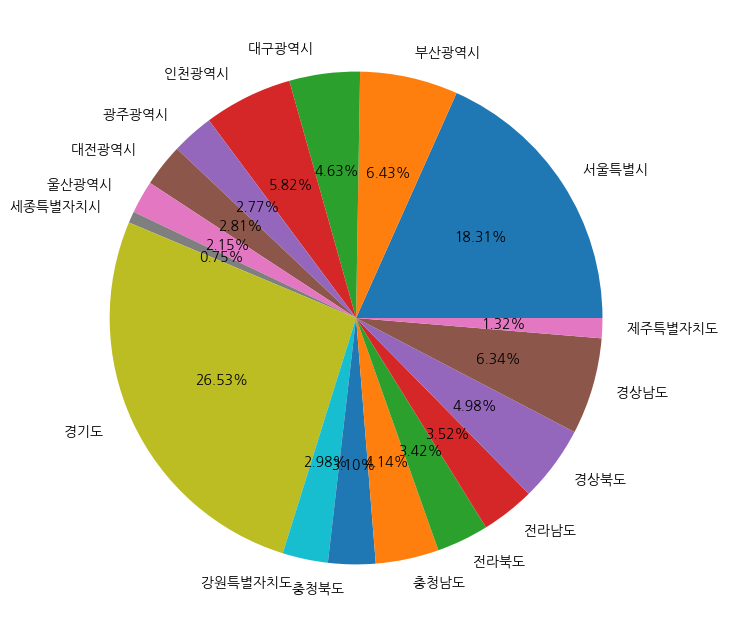

In [14]:
plt.figure(figsize=(8,8))
plt.pie(df_T['총인구수'],labels=df_T['행정구역'],autopct='%.2f%%')
plt.show()

7. 행정구역별 총 인구수를 BAR차트로 그리기

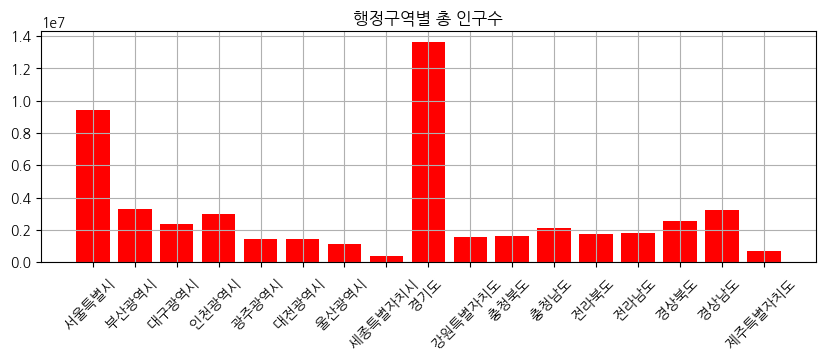

In [16]:
plt.figure(figsize=(10,3))
plt.bar(df_T['행정구역'],df_T['총인구수'],color='red')
plt.xticks(rotation=45)
plt.title('행정구역별 총 인구수')
plt.grid()
plt.show()

8. 가구당 인구수 선그래프

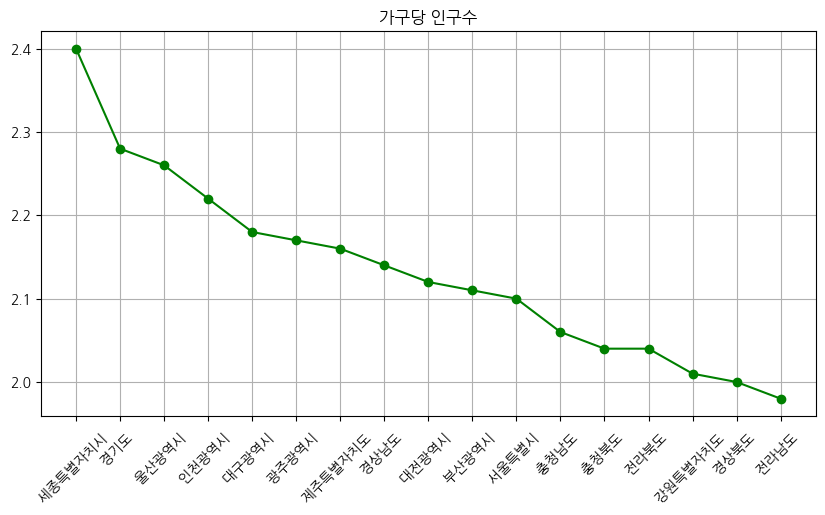

In [22]:
df_TT = df_T.sort_values('세대당인구',ascending=False)

plt.figure(figsize = (10, 5))
plt.plot(df_TT['행정구역'], df_TT['세대당인구'],marker='o', color='green')
plt.xticks(rotation=45)
plt.grid()
plt.title('가구당 인구수')
plt.show()

9. 행정구역별 남녀 성비

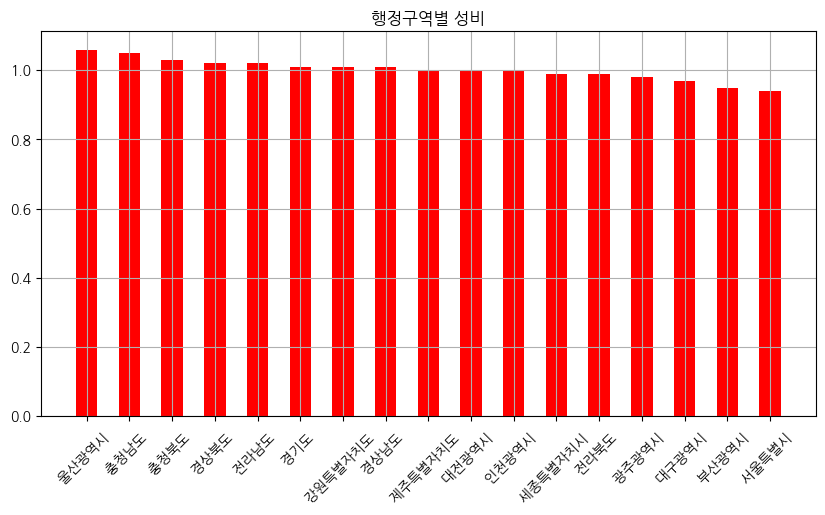

In [31]:
df_TT = df_T.sort_values('남이비율', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(df_TT['행정구역'], df_TT['남이비율'],width = 0.5,color='red')
plt.title('행정구역별 성비')
plt.xticks(rotation=45)
plt.grid()
plt.show()

10. 연령별인구데이터 가져오기

In [32]:
df_age = pd.read_csv('/content/연령별인구현황.csv')
df_age

,행정구역,2023년09월_계_총인구수,2023년09월_계_연령구간인구수,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
0,전국 (0000000000),51370001,51370001,227847,254937,270289,288109,313084,339240,374071,...,61056,42730,36208,27603,19972,13894,8269,6052,3811,8853
1,서울특별시 (1100000000),9407540,9407540,38101,41599,43518,44893,48097,51107,56215,...,8984,6319,5441,4430,3158,2286,1306,916,703,1505
2,부산광역시 (2600000000),3300836,3300836,12731,14447,15151,16419,17874,20165,22307,...,3585,2486,1904,1598,1229,834,447,336,195,448
3,대구광역시 (2700000000),2377801,2377801,9368,10734,11420,12781,14023,15529,17415,...,2749,1823,1384,1040,785,523,281,212,132,254
4,인천광역시 (2800000000),2987918,2987918,13832,15813,16381,17608,19488,20204,22415,...,2909,2156,1774,1427,1000,736,457,341,192,509
5,광주광역시 (2900000000),1422999,1422999,6284,7565,8137,8412,9274,10391,11333,...,1342,993,946,594,419,300,205,144,71,217
6,대전광역시 (3000000000),1444595,1444595,7272,7860,8079,8088,8874,9519,10851,...,1492,982,852,657,499,318,185,146,93,209
7,울산광역시 (3100000000),1104167,1104167,4916,5543,6155,6748,7275,8152,9148,...,756,515,391,335,238,185,111,82,47,79
8,세종특별자치시 (3600000000),385932,385932,2730,3265,3641,3761,4265,4565,5062,...,290,217,176,152,115,70,35,29,15,46
9,경기도 (4100000000),13626339,13626339,68842,77838,81286,86115,93507,100562,110052,...,12537,8892,7721,5942,4273,2961,1832,1336,883,1927


11. 필요없는 컬럼 삭제하기

In [33]:
df_age.columns

Index(['행정구역', '2023년09월_계_총인구수', '2023년09월_계_연령구간인구수', '2023년09월_계_0세',
       '2023년09월_계_1세', '2023년09월_계_2세', '2023년09월_계_3세', '2023년09월_계_4세',
       '2023년09월_계_5세', '2023년09월_계_6세',
       ...
       '2023년09월_계_91세', '2023년09월_계_92세', '2023년09월_계_93세', '2023년09월_계_94세',
       '2023년09월_계_95세', '2023년09월_계_96세', '2023년09월_계_97세', '2023년09월_계_98세',
       '2023년09월_계_99세', '2023년09월_계_100세 이상'],
      dtype='object', length=104)

In [34]:
df_age=df_age.drop(columns=['행정구역', '2023년09월_계_총인구수', '2023년09월_계_연령구간인구수'])
df_age

,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,2023년09월_계_8세,2023년09월_계_9세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
0,227847,254937,270289,288109,313084,339240,374071,426179,444248,441366,...,61056,42730,36208,27603,19972,13894,8269,6052,3811,8853
1,38101,41599,43518,44893,48097,51107,56215,64176,66545,66588,...,8984,6319,5441,4430,3158,2286,1306,916,703,1505
2,12731,14447,15151,16419,17874,20165,22307,25574,26525,26279,...,3585,2486,1904,1598,1229,834,447,336,195,448
3,9368,10734,11420,12781,14023,15529,17415,19957,20545,20383,...,2749,1823,1384,1040,785,523,281,212,132,254
4,13832,15813,16381,17608,19488,20204,22415,25279,26465,25924,...,2909,2156,1774,1427,1000,736,457,341,192,509
5,6284,7565,8137,8412,9274,10391,11333,12988,13458,13608,...,1342,993,946,594,419,300,205,144,71,217
6,7272,7860,8079,8088,8874,9519,10851,12176,12751,12566,...,1492,982,852,657,499,318,185,146,93,209
7,4916,5543,6155,6748,7275,8152,9148,10477,11009,10974,...,756,515,391,335,238,185,111,82,47,79
8,2730,3265,3641,3761,4265,4565,5062,5559,5794,5519,...,290,217,176,152,115,70,35,29,15,46
9,68842,77838,81286,86115,93507,100562,110052,125087,130506,128178,...,12537,8892,7721,5942,4273,2961,1832,1336,883,1927


In [35]:
import numpy as np

df_age.columns = np.arange(0,101)
df_age

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,227847,254937,270289,288109,313084,339240,374071,426179,444248,441366,...,61056,42730,36208,27603,19972,13894,8269,6052,3811,8853
1,38101,41599,43518,44893,48097,51107,56215,64176,66545,66588,...,8984,6319,5441,4430,3158,2286,1306,916,703,1505
2,12731,14447,15151,16419,17874,20165,22307,25574,26525,26279,...,3585,2486,1904,1598,1229,834,447,336,195,448
3,9368,10734,11420,12781,14023,15529,17415,19957,20545,20383,...,2749,1823,1384,1040,785,523,281,212,132,254
4,13832,15813,16381,17608,19488,20204,22415,25279,26465,25924,...,2909,2156,1774,1427,1000,736,457,341,192,509
5,6284,7565,8137,8412,9274,10391,11333,12988,13458,13608,...,1342,993,946,594,419,300,205,144,71,217
6,7272,7860,8079,8088,8874,9519,10851,12176,12751,12566,...,1492,982,852,657,499,318,185,146,93,209
7,4916,5543,6155,6748,7275,8152,9148,10477,11009,10974,...,756,515,391,335,238,185,111,82,47,79
8,2730,3265,3641,3761,4265,4565,5062,5559,5794,5519,...,290,217,176,152,115,70,35,29,15,46
9,68842,77838,81286,86115,93507,100562,110052,125087,130506,128178,...,12537,8892,7721,5942,4273,2961,1832,1336,883,1927


12. 연령별 인구데이터 BARH 그래프 그리기

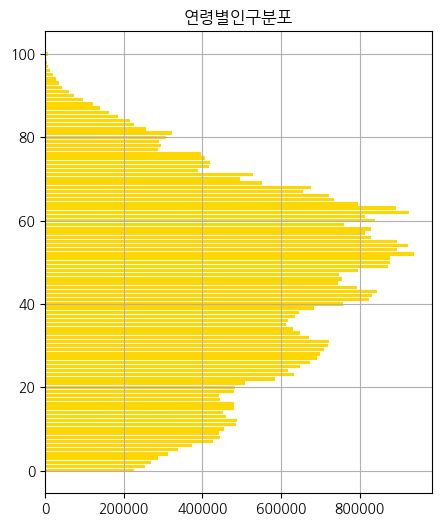

In [44]:
plt.figure(figsize=(5,6))
plt.barh(df_age.columns , df_age.iloc[0], color = 'gold')
plt.grid()
plt.title('연령별인구분포')
plt.show()